#Introduction to Data Science
##Programming Exercise: BAI TAP NHOM PCA & K-MEANS
##Nhom: 01

Thông tin thành viên

| **MSSV**     | **Họ Tên**            | **Tỉ lệ đóng góp** | **Ghi chú** |
|--------------|-----------------------|--------------------|-------------|
| **21280110** | Huỳnh Lê Minh Thư     |         25%        | Nhóm trưởng |
| **21280119** | Phạm Ngọc Phương Uyên |         25%        |             |
| **21280121** | Nguyễn Thúy Vy        |         25%        |             |
| **21280123** | Nguyễn Thị Lan Diệp   |         25%        |             |

## Đặt vấn đề

Pickle file này 
https://drive.google.com/.../1To0FuKhKyxT8iP6lxvw.../view là 1 list, mỗi element là 1 pandas df.

Trong mỗi df đó thì index là theo datetime, các cột: theo từng mã cổ phiếu + chứa khối lượng/giá của các lệnh mua/bán sát với giá khớp nhất,
khối lượng của các lệnh mua/bán sát với giá khớp thứ 2,
cột 'Gia KL' chứa giá phái sinh tại thời điểm đó (giá phái sinh gần với VN30index)
- PCA có chọn lọc feature 
- Clustering để tìm pattern

p/s: Data chưa rất nhiều NaN

## Các bước tiếp cận bài toán
Giải quyết bài toán theo giá mua, giá bán của 30 loại cổ phiếu. Sử dụng thư viện sklearn 
- 1: Xử lý và chuẩn hoá dữ liệu
- 2: PCA để giảm chiều dữ liệu xuống còn 3 thành phần chính
- 3: K-Means Clustering để phân cụm 3 thành phần chính phía trên
- 4: Visualize kết quả
- 5: Nhận xét 

## Chuẩn bị 

Load các thư viện và file cần thiết

In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.preprocessing import StandardScaler

# Xử lý dữ liệu

## Load data pickle và merge các data frame trong file pickle thành một data frame

In [2]:
with open('df_merged.pkl', 'rb') as f:
  data = pickle.load(f)

df = pd.concat(data,axis = 0)

In [3]:
print(df.shape)
pd.set_option('display.max_columns', None)
df.head()

(30538, 181)


,mua_gia_1ACB,mua_gia_1BCM,mua_gia_1BID,mua_gia_1BVH,mua_gia_1CTG,mua_gia_1FPT,mua_gia_1GAS,mua_gia_1GVR,mua_gia_1HDB,mua_gia_1HPG,mua_gia_1MBB,mua_gia_1MSN,mua_gia_1MWG,mua_gia_1NVL,mua_gia_1PDR,mua_gia_1PLX,mua_gia_1POW,mua_gia_1SAB,mua_gia_1SSI,mua_gia_1STB,mua_gia_1TCB,mua_gia_1TPB,mua_gia_1VCB,mua_gia_1VHM,mua_gia_1VIB,mua_gia_1VIC,mua_gia_1VJC,mua_gia_1VNM,mua_gia_1VPB,mua_gia_1VRE,ban_gia_1ACB,ban_gia_1BCM,ban_gia_1BID,ban_gia_1BVH,ban_gia_1CTG,ban_gia_1FPT,ban_gia_1GAS,ban_gia_1GVR,ban_gia_1HDB,ban_gia_1HPG,ban_gia_1MBB,ban_gia_1MSN,ban_gia_1MWG,ban_gia_1NVL,ban_gia_1PDR,ban_gia_1PLX,ban_gia_1POW,ban_gia_1SAB,ban_gia_1SSI,ban_gia_1STB,ban_gia_1TCB,ban_gia_1TPB,ban_gia_1VCB,ban_gia_1VHM,ban_gia_1VIB,ban_gia_1VIC,ban_gia_1VJC,ban_gia_1VNM,ban_gia_1VPB,ban_gia_1VRE,Gia KL,mua_kl_1ACB,mua_kl_1BCM,mua_kl_1BID,mua_kl_1BVH,mua_kl_1CTG,mua_kl_1FPT,mua_kl_1GAS,mua_kl_1GVR,mua_kl_1HDB,mua_kl_1HPG,mua_kl_1MBB,mua_kl_1MSN,mua_kl_1MWG,mua_kl_1NVL,mua_kl_1PDR,mua_kl_1PLX,mua_kl_1POW,mua_kl_1SAB,mua_kl_1SSI,mua_kl_1STB,mua_kl_1TCB,mua_kl_1TPB,mua_kl_1VCB,mua_kl_1VHM,mua_kl_1VIB,mua_kl_1VIC,mua_kl_1VJC,mua_kl_1VNM,mua_kl_1VPB,mua_kl_1VRE,ban_kl_1ACB,ban_kl_1BCM,ban_kl_1BID,ban_kl_1BVH,ban_kl_1CTG,ban_kl_1FPT,ban_kl_1GAS,ban_kl_1GVR,ban_kl_1HDB,ban_kl_1HPG,ban_kl_1MBB,ban_kl_1MSN,ban_kl_1MWG,ban_kl_1NVL,ban_kl_1PDR,ban_kl_1PLX,ban_kl_1POW,ban_kl_1SAB,ban_kl_1SSI,ban_kl_1STB,ban_kl_1TCB,ban_kl_1TPB,ban_kl_1VCB,ban_kl_1VHM,ban_kl_1VIB,ban_kl_1VIC,ban_kl_1VJC,ban_kl_1VNM,ban_kl_1VPB,ban_kl_1VRE,mua_kl_2ACB,mua_kl_2BCM,mua_kl_2BID,mua_kl_2BVH,mua_kl_2CTG,mua_kl_2FPT,mua_kl_2GAS,mua_kl_2GVR,mua_kl_2HDB,mua_kl_2HPG,mua_kl_2MBB,mua_kl_2MSN,mua_kl_2MWG,mua_kl_2NVL,mua_kl_2PDR,mua_kl_2PLX,mua_kl_2POW,mua_kl_2SAB,mua_kl_2SSI,mua_kl_2STB,mua_kl_2TCB,mua_kl_2TPB,mua_kl_2VCB,mua_kl_2VHM,mua_kl_2VIB,mua_kl_2VIC,mua_kl_2VJC,mua_kl_2VNM,mua_kl_2VPB,mua_kl_2VRE,ban_kl_2ACB,ban_kl_2BCM,ban_kl_2BID,ban_kl_2BVH,ban_kl_2CTG,ban_kl_2FPT,ban_kl_2GAS,ban_kl_2GVR,ban_kl_2HDB,ban_kl_2HPG,ban_kl_2MBB,ban_kl_2MSN,ban_kl_2MWG,ban_kl_2NVL,ban_kl_2PDR,ban_kl_2PLX,ban_kl_2POW,ban_kl_2SAB,ban_kl_2SSI,ban_kl_2STB,ban_kl_2TCB,ban_kl_2TPB,ban_kl_2VCB,ban_kl_2VHM,ban_kl_2VIB,ban_kl_2VIC,ban_kl_2VJC,ban_kl_2VNM,ban_kl_2VPB,ban_kl_2VRE
_time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2023-04-19 02:15:30+00:00,24.75,78.7,44.6,47.05,29.05,79.5,97.0,15.5,19.25,21.0,12.133333,78.2,40.05,15.0,13.900000,36.9,13.45,166.05,21.75,25.95,29.15,22.75,88.1,50.8,20.7,52.6,99.0,73.0,20.4,28.60,24.8,79.5,44.75,47.1,29.1,79.8,97.5,15.6,19.35,21.05,18.25,78.5,40.100000,9.03,13.95,36.95,13.5,167.8,21.8,26.0,29.2,22.8,88.2,50.9,20.75,52.7,99.9,73.1,20.45,28.65,1063.400000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,370.0,0.0,7030.0,3760.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,250.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,10250.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,710.0,0.0,10.0,450.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,110.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,50.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-04-19 02:15:40+00:00,24.75,78.7,44.6,47.05,29.05,79.5,97.0,15.5,19.25,21.0,12.133333,78.2,40.05,15.0,13.900000,36.9,13.45,166.05,21.75,25.95,29.15,22.75,88.1,50.8,20.7,52.6,99.0,73.0,20.4,28.60,24.8,79.5,44.75,47.1,29.1,79.8,97.5,15.6,19.35,21.05,18.25,78.5,40.100000,9.03,13.95,36.95,13.5,167.8,21.8,26.0,29.2,22.8,88.2,50.9,20.75,52.7,99.9,73.1,20.45,28.65,1063.483333,1810.0,0.0,20.0,430.0,450.0,0.0,240.0,2190.0,0.0,4955.0,4373.333333,0.0,40.0,5085.0,3680.000000,100.0,31550.0,15.0,2750.0,170.000000,0.0,0.0,60.0,180.0,1080.0,0.000000,30.0,410.0,1290.0,30.0,530.0,0.0,150.0,120.0,1080.0,330.0,160.0,0.0,3440.0,6670.0,4

Chọn giá mua và giá bán của 30 mã cổ phiếu để tiến hành phân tích. Những dữ liệu này không có NaN biểu diễn chính xác sự biến động của thị trường theo thời gian.

In [4]:
cols_gia = df.columns[:60]
df_gia = df[cols_gia]

## Chuẩn hoá dữ liệu

In [5]:
# Chuẩn hoá dữ liệu bằng StandardScaler
from sklearn.preprocessing import StandardScaler
df_gia_std = StandardScaler().fit_transform(df_gia)
df_gia_std = pd.DataFrame(df_gia_std,columns=cols_gia)
df_gia_std

,mua_gia_1ACB,mua_gia_1BCM,mua_gia_1BID,mua_gia_1BVH,mua_gia_1CTG,mua_gia_1FPT,mua_gia_1GAS,mua_gia_1GVR,mua_gia_1HDB,mua_gia_1HPG,mua_gia_1MBB,mua_gia_1MSN,mua_gia_1MWG,mua_gia_1NVL,mua_gia_1PDR,mua_gia_1PLX,mua_gia_1POW,mua_gia_1SAB,mua_gia_1SSI,mua_gia_1STB,mua_gia_1TCB,mua_gia_1TPB,mua_gia_1VCB,mua_gia_1VHM,mua_gia_1VIB,mua_gia_1VIC,mua_gia_1VJC,mua_gia_1VNM,mua_gia_1VPB,mua_gia_1VRE,ban_gia_1ACB,ban_gia_1BCM,ban_gia_1BID,ban_gia_1BVH,ban_gia_1CTG,ban_gia_1FPT,ban_gia_1GAS,ban_gia_1GVR,ban_gia_1HDB,ban_gia_1HPG,ban_gia_1MBB,ban_gia_1MSN,ban_gia_1MWG,ban_gia_1NVL,ban_gia_1PDR,ban_gia_1PLX,ban_gia_1POW,ban_gia_1SAB,ban_gia_1SSI,ban_gia_1STB,ban_gia_1TCB,ban_gia_1TPB,ban_gia_1VCB,ban_gia_1VHM,ban_gia_1VIB,ban_gia_1VIC,ban_gia_1VJC,ban_gia_1VNM,ban_gia_1VPB,ban_gia_1VRE
0,0.057511,-1.719730,-1.063550,-2.507077,0.006704,0.148587,-1.985533,0.232540,0.518657,0.541051,-12.269886,-0.065056,0.621822,1.563494,1.404561,0.230965,0.704156,-1.768028,0.398481,0.337387,0.449065,0.467754,-0.778911,0.494288,-0.908077,-0.651525,-1.422319,-1.009867,-0.587391,-0.703063,0.051880,-1.082185,-0.951893,-2.251042,-0.000783,0.327300,-1.838763,0.311783,0.595159,0.517446,-0.017993,0.088893,0.633455,-3.153575,1.372207,0.214295,0.773552,-1.549582,0.401095,0.325099,0.451327,0.450536,-0.742550,0.492051,-0.922993,-0.619032,-1.165940,-1.063273,-0.600834,-0.820001
1,0.057511,-1.719730,-1.063550,-2.507077,0.006704,0.148587,-1.985533,0.232540,0.518657,0.541051,-12.269886,-0.065056,0.621822,1.563494,1.404561,0.230965,0.704156,-1.768028,0.398481,0.337387,0.449065,0.467754,-0.778911,0.494288,-0.908077,-0.651525,-1.422319,-1.009867,-0.587391,-0.703063,0.051880,-1.082185,-0.951893,-2.251042,-0.000783,0.327300,-1.838763,0.311783,0.595159,0.517446,-0.017993,0.088893,0.633455,-3.153575,1.372207,0.214295,0.773552,-1.549582,0.401095,0.325099,0.451327,0.450536,-0.742550,0.492051,-0.922993,-0.619032,-1.165940,-1.063273,-0.600834,-0.820001
2,0.057511,-1.719730,-1.063550,-2.507077,0.006704,0.148587,-1.985533,0.232540,0.518657,0.541051,-0.023317,-0.065056,0.621822,1.563494,1.404561,0.230965,0.704156,-1.761189,0.398481,0.261523,0.449065,0.467754,-0.778911,0.494288,-0.908077,-0.651525,-1.422319,-1.009867,-0.587391,-0.703063,0.051880,-1.082185,-0.951893,-2.251042,-0.000783,0.327300,-1.838763,0.311783,0.528642,0.517446,-0.017993,0.088893,0.633455,1.558441,1.372207,0.214295,0.773552,-1.549582,0.401095,0.325099,0.451327,0.450536,-0.742550,0.492051,-0.922993,-0.619032,-1.165940,-1.063273,-0.600834,-0.820001
3,0.057511,-1.719730,-1.063550,-2.507077,0.006704,0.148587,-1.985533,0.232540,0.518657,0.541051,-0.023317,-0.065056,0.621822,1.563494,1.471766,0.230965,0.704156,-1.761189,0.398481,0.261523,0.449065,0.467754,-0.831408,0.411429,-0.908077,-0.651525,-1.502795,-1.009867,-0.587391,-0.779334,0.051880,-1.082185,-0.951893,-2.251042,-0.000783,0.327300,-1.838763,0.311783,0.528642,0.517446,-0.017993,0.014987,0.588246,1.558441,1.437549,0.214295,0.773552,-1.563019,0.401095,0.325099,0.451327,0.450536,-0.791140,0.450765,-0.922993,-0.619032,-1.513280,-1.063273,-0.600834,-0.820001
4,0.057511,-1.719730,-1.063550,-2.507077,0.006704,0.148587,-1.985533,0.232540,0.518657,0.541051,-0.023317,-0.065056,0.621822,1.563494,1.449364,0.230965,0.704156,-1.747510,0.398481,0.261523,0.449065,0.467754,-0.831408,0.411429,-0.908077,-0.651525,-1.502795,-1.009867,-0.587391,-0.779334,0.051880,-1.082185,-0.951893,-2.251042,-0.000783,0.327300,-1.838763,0.311783,0.528642,0.517446,-0.017993,0.014987,0.603316,1.558441,1.437549,0.214295,0.773552,-1.563019,0.401095,0.325099,0.451327,0.450536,-0.791140,0.450765,-0.922993,-0.619032,-1.513280,-1.063273,-0.600834,-0.906369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30533,-1.269453,0.262419,0.044016,0.684532,-1.899071,-1.413574,1.021500,-1.518677,-1.399867,-1.541503,-1.840116,1.551973,

# Principal Component Analysis

Các bước của thuật toán PCA: (Eigendecomposition)
1. Chuẩn hóa dữ liệu
2. Xây dựng ma trận hiệp phương sai từ dữ liệu đã được chuẩn hoá
3. Tìm các vector riêng, trị riêng của ma trận hiệp phương sai
4. Xây dựng tập trực chuẩn từ tập hợp các vector trên
5. Sắp xếp các trị riêng theo chiều tăng dần
6. Chọn $k$ vector riêng đầu tiên ứng với $k$ trị riêng đầu tiên trong bộ trị riêng có thứ tự ở bước trên $(k << d)$
7. Xây dựng ma trận chiếu $W$ từ các vector riêng trên
8. Tìm hình chiếu $Y$ của ma trận dữ liệu $X$ trong không gian mới sinh bởi ma trận $W$, khi đó $Y$ = $WX$



## PCA để tìm số thành phần tối ưu nhất

In [6]:
from sklearn.decomposition import PCA
pca_t = PCA()
X_pca = pca_t.fit_transform(df_gia_std)
np.cumsum(pca_t.explained_variance_ratio_)

array([0.46857416, 0.71028167, 0.76665331, 0.79931876, 0.82633904,
       0.85134643, 0.8711567 , 0.88867111, 0.90363737, 0.91785554,
       0.92918848, 0.93896329, 0.94624536, 0.95227664, 0.95767548,
       0.96268802, 0.96685396, 0.970716  , 0.97402678, 0.97712986,
       0.9801409 , 0.98266592, 0.98476367, 0.98662827, 0.98842725,
       0.9898682 , 0.99105202, 0.99209781, 0.99304749, 0.99386123,
       0.99462951, 0.9952779 , 0.99586986, 0.99641098, 0.99690406,
       0.99737442, 0.99773032, 0.99805749, 0.99834105, 0.99860416,
       0.99885298, 0.99905382, 0.99922464, 0.99936556, 0.99950558,
       0.99961681, 0.99970814, 0.99977737, 0.99983139, 0.99986695,
       0.99989974, 0.99992036, 0.999939  , 0.99995617, 0.99997233,
       0.99998206, 0.99998938, 0.99999337, 0.99999712, 1.        ])

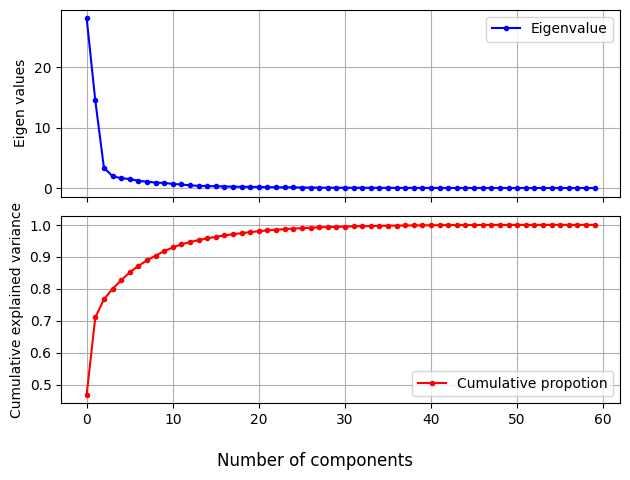

In [7]:
fig, axes = plt.subplots(nrows = 2, ncols = 1, sharex = True) 
# vẽ đồ thị line-plot
axes[0].plot( pca_t.explained_variance_,color = 'b',marker = '.',label = 'Eigenvalue')
axes[1].plot(np.cumsum(pca_t.explained_variance_ratio_),marker = '.', color = 'r', label = 'Cumulative propotion')
    
# hiển thị nhãn cho trục tung
axes[0].set_ylabel('Eigen values')
axes[1].set_ylabel('Cumulative explained variance')

# hiển thị mô tả của đồ thị
axes[0].legend()
axes[1].legend()

# tạo lưới
axes[0].grid()
axes[1].grid()

# tạo tiêu đề chung cho figure
fig.supxlabel('Number of components')
plt.tight_layout()
plt.show()

- Dựa vào đồ thị và tỉ lệ phần trăm phương sai tích luỹ trên, ta thấy có hơn 76% sự biến thiên của dữ liệu phụ thuộc vào 3 principal components đầu tiên. Do đó, ta chọn 3 principal components đó để tiến hành phân cụm theo thuật toán Kmeans.

- Dựa vào hai đồ thị trên, chúng tôi sẽ chọn số lượng principal component sao cho chúng tôi có thể giải thích được hơn 76%

- Sau đó, ta xây dựng ma trận chiếu $W$ từ 3 vector riêng tương ứng với 3 principal components trên. Tiếp đó, tìm hình chiếu $Y$ của ma trận dữ liệu $X$ trong không gian mới sinh bởi ma trận $W$ và thực hiện phân cụm.

## Sau khi tìm được n_components quan trọng nhất, ta tiến hành PCA thật

In [8]:
pca = PCA(n_components=3)
principal_components = pca.fit_transform(df_gia_std)
principal_df = pd.DataFrame(data = principal_components, columns = ['PC1', 'PC2', 'PC3'])
principal_df

,PC1,PC2,PC3
0,-1.310372,5.905709,1.856975
1,-1.310372,5.905709,1.856975
2,-4.087900,5.371390,1.983480
3,-4.133918,5.494784,1.984542
4,-4.131077,5.510706,1.976827
...,...,...,...
30533,10.071921,3.205419,-2.442355
30534,10.101861,3.213948,-2.414119
30535,33.762163,15.462859,1.512074
30536,33.762163,15.462859,1.512074


# K-Means

##Các bước của thuật toán Kmeans: (Kmeans clustering)

**Đầu vào:** Ma trận dữ liệu $Y \in \mathbb{R}^{d \times N}$ và số lượng cluster cần tìm K \< N. \\
**Đầu ra:** Ma trận các centroid $M \in \mathbb{R}^{d \times K}$ và ma trận label $L \in \mathbb{R}^{N \times K}$
1. Chọn K điểm bất kỳ trong training set làm các centroid ban đầu.
2. Phân mỗi điểm dữ liệu vào cluster có centroid gần nó nhất.
3. Nếu việc phân nhóm dữ liệu vào từng cluster ở bước 2 không thay đổi so với vòng lặp trước nó thì ta dừng thuật toán.
4. Cập nhật centroid cho từng cluster bằng cách lấy trung bình cộng tất cả các điểm dữ liệu đã được gán vào cluster đó sau bước 2.
5. Quay lại bước 2.

## Standardize dữ liệu trước khi clustering bằng StandardScaler

In [9]:
pcp_std = StandardScaler().fit_transform(principal_df)
pcp_std = pd.DataFrame(pcp_std,columns=['PC1','PC2','PC3'])
pcp_std

,PC1,PC2,PC3
0,-0.247132,1.550784,1.009718
1,-0.247132,1.550784,1.009718
2,-0.770967,1.410477,1.078504
3,-0.779645,1.442879,1.079082
4,-0.779109,1.447060,1.074887
...,...,...,...
30533,1.899536,0.841713,-1.328014
30534,1.905182,0.843953,-1.312661
30535,6.367449,4.060402,0.822180
30536,6.367449,4.060402,0.822180


## Sử dụng phương pháp Elbow để tìm số cụm tối ưu nhất.

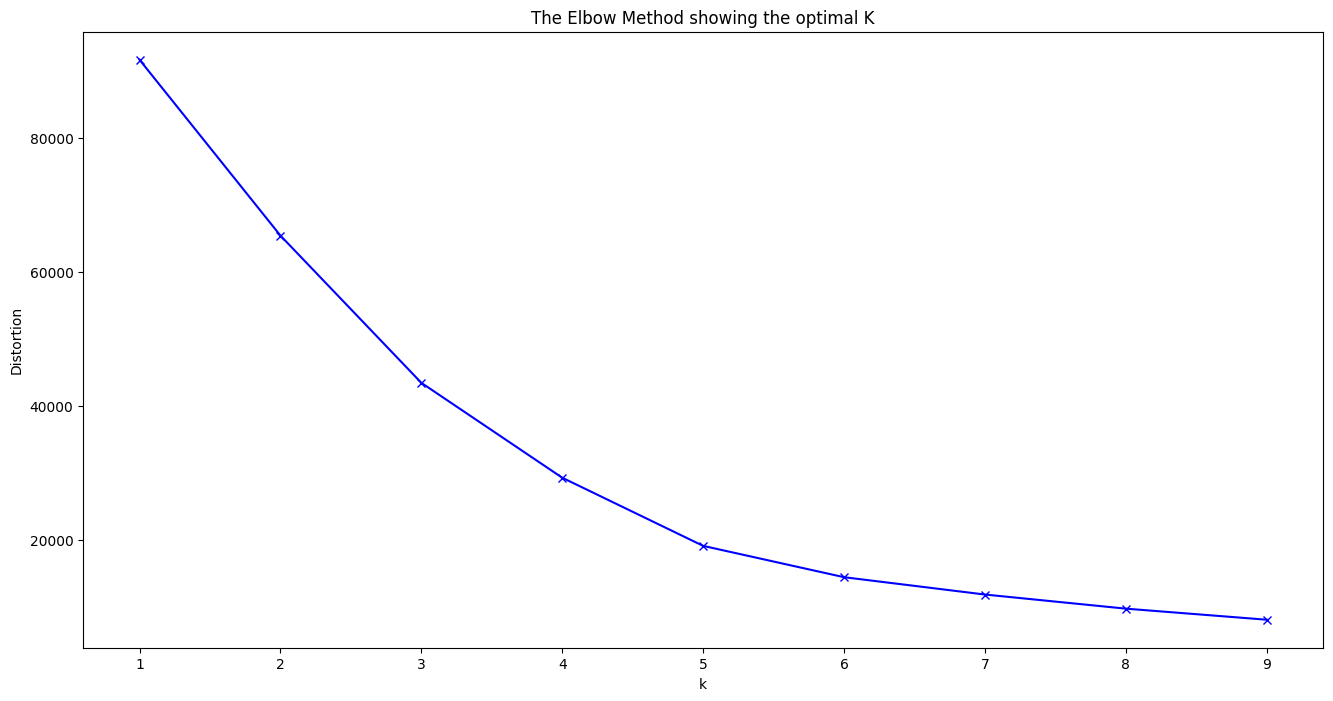

In [10]:
from sklearn.cluster import KMeans
distortions = []
K = range(1,10)
for k in K:
    kmean_model = KMeans(n_clusters=k, n_init=10)
    kmean_model.fit(pcp_std)
    distortions.append(kmean_model.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal K')
plt.show()

Dựa vào đồ thị trên, số cụm tối ưu nhất là 4.

## Sau khi tìm đươc k=4 cụm tối ưu nhất, ta tiến hành phân cụm thật

In [11]:
kmeans = KMeans(n_clusters=4,n_init=20).fit(pcp_std)


Gán nhãn cho dữ liệu theo từng cụm tương ứng.

In [12]:
targets = pd.DataFrame(kmeans.labels_,columns=['target'])
final_df = pd.concat([pcp_std, targets], axis = 1)
final_df.index = df_gia.index
final_df

,PC1,PC2,PC3,target
_time,,,,
2023-04-19 02:15:30+00:00,-0.247132,1.550784,1.009718,2
2023-04-19 02:15:40+00:00,-0.247132,1.550784,1.009718,2
2023-04-19 02:15:50+00:00,-0.770967,1.410477,1.078504,2
2023-04-19 02:16:00+00:00,-0.779645,1.442879,1.079082,2
2023-04-19 02:16:10+00:00,-0.779109,1.447060,1.074887,2
...,...,...,...,...
2023-03-20 07:30:10+00:00,1.899536,0.841713,-1.328014,3
2023-03-20 07:30:20+00:00,1.905182,0.843953,-1.312661,3
2023-03-20 07:30:40+00:00,6.367449,4.060402,0.822180,3


## Trực quan hoá các cụm dữ liệu theo 2 principal components đầu tiên

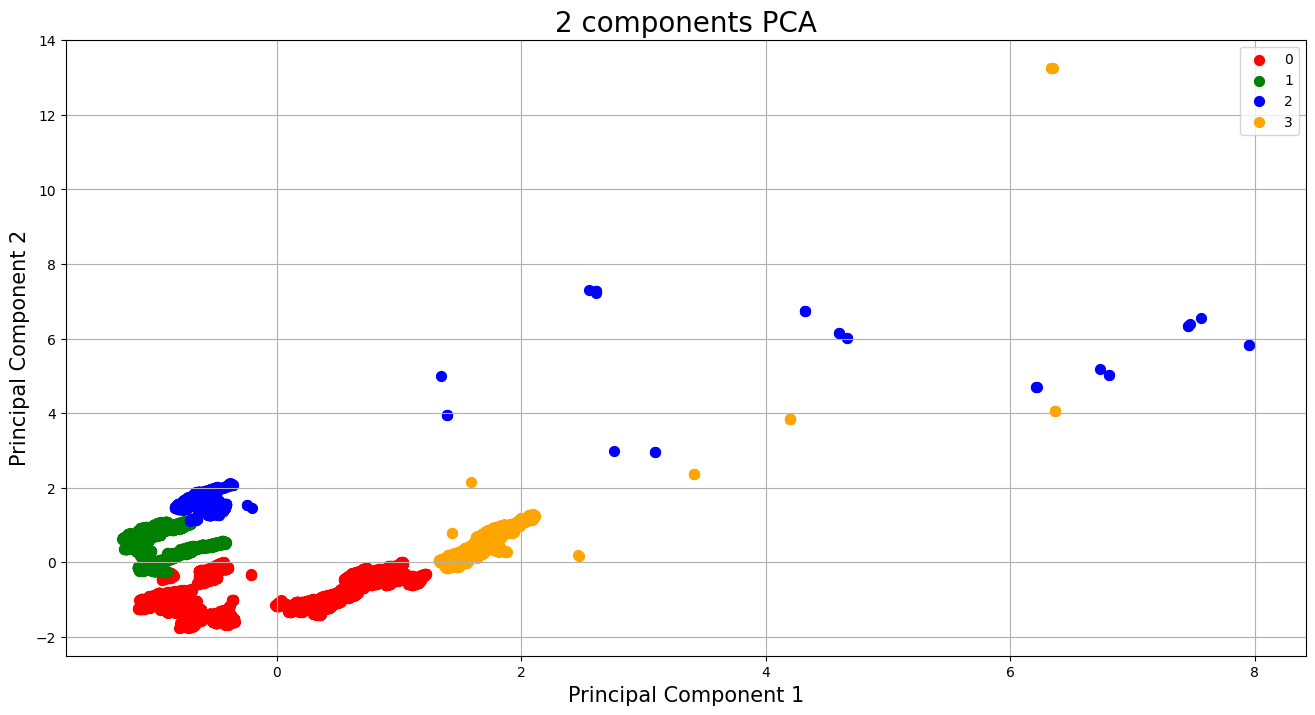

In [13]:
fig = plt.figure(figsize = (16,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 components PCA', fontsize = 20)

targets = [0, 1, 2, 3]
colors = ['red', 'green', 'blue', 'orange']
for target, color in zip(targets,colors):
    indicesToKeep = final_df['target'] == target
    ax.scatter(final_df.loc[indicesToKeep, 'PC1'], final_df.loc[indicesToKeep, 'PC2'], c = color, s = 50)
ax.legend(targets)
ax.grid()

- Dựa vào đồ thị trên, có thể nhận thấy rằng dữ liệu được phân làm bốn cụm phân biệt. Mỗi cụm tương ứng với một tập hợp chuỗi thời gian - tập hợp các thời điểm khác nhau, mà tại đó giá mua và giá bán của các mã cổ phiếu có những tác động khác nhau đến sự biến động của thị trường nói chung.

- Trong đó, Principal Component 1 sẽ có tải trọng (sức ảnh hưởng) đến sự biến thiên của dữ liệu lớn hơn so với Principal Component 2. Và tương tự, Principal Component 2 sẽ có tải trọng lớn hơn Principal Component 3. Điều này có nghĩa rằng sẽ có khoảng thời gian mà thị trường bị tác động bởi các mã cổ phiếu này nhiều hơn các mã cổ phiếu khác. Vì vậy, sự khác biệt giữa các cụm dọc theo trục PC1 lớn hơn khoảng cách tìm kiếm dọc theo trục PC2.

- Cụm màu đỏ và cụm màu chàm khác nhau trên Principal Component 1. Cụm màu đỏ, cụm màu vàng và cụm màu lục khác nhau trên Principal Component 2. Sự khác nhau này tương đương với sức ảnh hưởng của các Principal Components đến các cụm tương ứng.

## Trực quan hoá các cụm dữ liệu theo 3 principal components đầu tiên



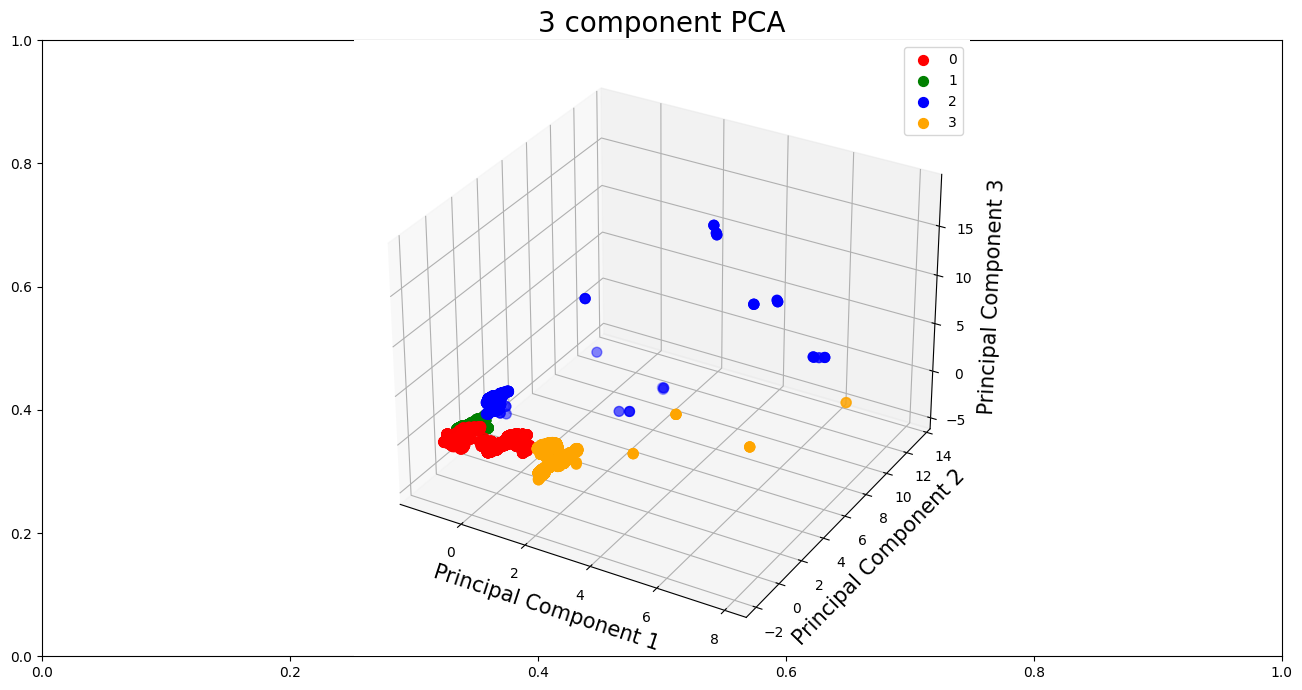

In [14]:
# 3D visualization
fig = plt.figure(figsize = (16,8))
ax = fig.add_subplot(1,1,1) 
ax = plt.axes(projection='3d')
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)
ax.set_title('3 component PCA', fontsize = 20)

targets = [0, 1, 2, 3]
colors = ['red', 'green', 'blue', 'orange']
# markers = ['s', '.', 'o', 'x']
for target, color in zip(targets,colors):
    indicesToKeep = final_df['target'] == target
    ax.scatter(final_df.loc[indicesToKeep, 'PC1'], final_df.loc[indicesToKeep, 'PC2'], final_df.loc[indicesToKeep, 'PC3'], c = color, s = 50)
ax.legend(targets)
ax.grid()

# Giải thích kết quả

## Vẽ biểu đồ ma trận tải của từng mã cổ phiếu lên các Principal Components để có cái nhìn trực quan hơn

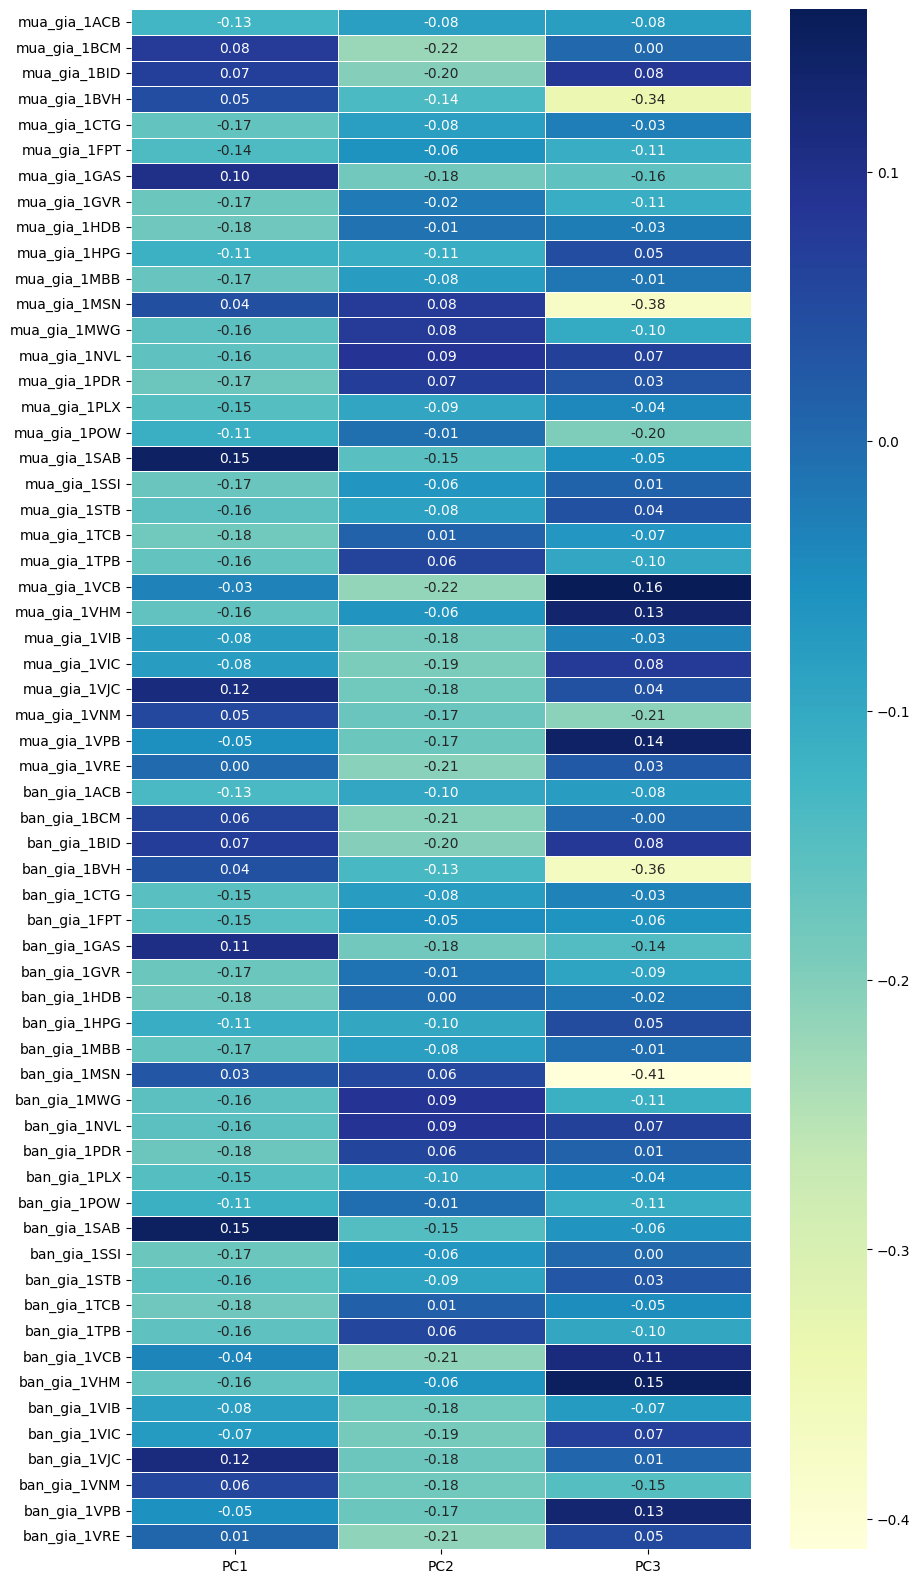

In [ ]:
component_df=pd.DataFrame((pca.components_),index=["PC1","PC2","PC3"],columns=df_gia.columns)
component_df=component_df.T
# Heat map
fig = plt.figure(figsize = (10,20))
import seaborn as sns
sns.heatmap(component_df,cmap='YlGnBu', linewidths=.7, annot=True, fmt='.2f')
plt.show()

## Ma trận tải trọng của từng mã cổ phiếu lên các Principal Components

In [15]:
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2', 'PC3'], index=df_gia.columns)
loadings.sort_values('PC1', ascending=False).head(10)

,PC1,PC2,PC3
ban_gia_1SAB,0.149149,-0.146439,-0.061884
mua_gia_1SAB,0.145130,-0.153425,-0.053792
mua_gia_1VJC,0.116197,-0.181078,0.039421
ban_gia_1VJC,0.115136,-0.175866,0.005073
ban_gia_1GAS,0.106744,-0.182706,-0.144882
mua_gia_1GAS,0.101363,-0.182585,-0.160995
mua_gia_1BCM,0.075882,-0.223736,0.003158
ban_gia_1BID,0.071538,-0.202811,0.080999
mua_gia_1BID,0.070327,-0.203558,0.082434
ban_gia_1BCM,0.064230,-0.205097,-0.003214


- Nhận xét: PC1 chịu ảnh hưởng nhiều nhất bởi các mã cổ phiếu theo thứ tự: ban_gia_1SAB, mua_gia_1_SAB, mua_gia_1VJC, ban_gia_1VJC

In [ ]:
loadings.sort_values('PC2', ascending=False).head(10)

,PC1,PC2,PC3
ban_gia_1MWG,-0.158449,0.088446,-0.113646
mua_gia_1NVL,-0.160704,0.087566,0.066315
ban_gia_1NVL,-0.158045,0.087360,0.066003
mua_gia_1MSN,0.042152,0.077584,-0.375755
mua_gia_1MWG,-0.157606,0.075934,-0.102932
mua_gia_1PDR,-0.174840,0.072942,0.031813
mua_gia_1TPB,-0.164803,0.063818,-0.095226
ban_gia_1PDR,-0.176477,0.059153,0.012251
ban_gia_1TPB,-0.161057,0.055515,-0.097043
ban_gia_1MSN,0.029164,0.055229,-0.411381


- Nhận xét: PC2 chịu ảnh hưởng nhiều nhất bởi các mã cổ phiếu theo thứ tự: ban_gia_1MWG, mua_gia_1_NVL, ban_gia_1NVL, mua_gia_1MSN

In [ ]:
loadings.sort_values('PC3', ascending=False).head(10)

,PC1,PC2,PC3
mua_gia_1VCB,-0.033566,-0.216854,0.160380
ban_gia_1VHM,-0.161655,-0.060159,0.150044
mua_gia_1VPB,-0.053573,-0.173162,0.143748
mua_gia_1VHM,-0.163207,-0.062293,0.134365
ban_gia_1VPB,-0.054875,-0.173992,0.130628
ban_gia_1VCB,-0.036439,-0.211218,0.114719
mua_gia_1BID,0.070327,-0.203558,0.082434
ban_gia_1BID,0.071538,-0.202811,0.080999
mua_gia_1VIC,-0.075110,-0.193426,0.078336
ban_gia_1VIC,-0.072493,-0.186346,0.068483


- Nhận xét: PC3 chịu ảnh hưởng nhiều nhất bởi các mã cổ phiếu theo thứ tự: mua_gia_1VCB, ban_gia_1VHM, mua_gia_1VPB, mua_gia_1VHM

## Ma trận hệ số tương quan giữa các mã cổ phiếu và các Principal Components

In [16]:
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

loading_matrix = pd.DataFrame(loadings, columns=['PC1', 'PC2', 'PC3'], index=df_gia.columns)
loading_matrix.head()

,PC1,PC2,PC3
mua_gia_1ACB,-0.671553,-0.313683,-0.145092
mua_gia_1BCM,0.402354,-0.852047,0.005807
mua_gia_1BID,0.372902,-0.775202,0.151607
mua_gia_1BVH,0.246404,-0.525864,-0.617208
mua_gia_1CTG,-0.875613,-0.313557,-0.051198


# Nhận xét

So sánh đồ thị giữa data khi PCA & KMeans Clustering với data ban đầu chỉ K-Means Clustering

In [17]:
final_df_raw = pd.concat([df_gia, final_df], axis = 1)
final_df_raw

,mua_gia_1ACB,mua_gia_1BCM,mua_gia_1BID,mua_gia_1BVH,mua_gia_1CTG,mua_gia_1FPT,mua_gia_1GAS,mua_gia_1GVR,mua_gia_1HDB,mua_gia_1HPG,mua_gia_1MBB,mua_gia_1MSN,mua_gia_1MWG,mua_gia_1NVL,mua_gia_1PDR,mua_gia_1PLX,mua_gia_1POW,mua_gia_1SAB,mua_gia_1SSI,mua_gia_1STB,mua_gia_1TCB,mua_gia_1TPB,mua_gia_1VCB,mua_gia_1VHM,mua_gia_1VIB,mua_gia_1VIC,mua_gia_1VJC,mua_gia_1VNM,mua_gia_1VPB,mua_gia_1VRE,ban_gia_1ACB,ban_gia_1BCM,ban_gia_1BID,ban_gia_1BVH,ban_gia_1CTG,ban_gia_1FPT,ban_gia_1GAS,ban_gia_1GVR,ban_gia_1HDB,ban_gia_1HPG,ban_gia_1MBB,ban_gia_1MSN,ban_gia_1MWG,ban_gia_1NVL,ban_gia_1PDR,ban_gia_1PLX,ban_gia_1POW,ban_gia_1SAB,ban_gia_1SSI,ban_gia_1STB,ban_gia_1TCB,ban_gia_1TPB,ban_gia_1VCB,ban_gia_1VHM,ban_gia_1VIB,ban_gia_1VIC,ban_gia_1VJC,ban_gia_1VNM,ban_gia_1VPB,ban_gia_1VRE,PC1,PC2,PC3,target
_time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2023-04-19 02:15:30+00:00,24.750,78.7,44.60,47.05,29.05,79.50,97.0,15.500000,19.250,21.000000,12.133333,78.2,40.05,15.0,13.900000,36.90,13.450,166.05,21.750000,25.950000,29.1500,22.75,88.1,50.80,20.70,52.6,99.0,73.0,20.40,28.60,24.80,79.5,44.75,47.10,29.10,79.8,97.5,15.6000,19.35,21.05,18.25,78.5,40.100000,9.0300,13.950000,36.95,13.5,167.8,21.800000,26.000,29.200,22.80,88.2,50.90,20.75,52.7,99.9,73.1,20.45,28.650,-0.247132,1.550784,1.009718,2
2023-04-19 02:15:40+00:00,24.750,78.7,44.60,47.05,29.05,79.50,97.0,15.500000,19.250,21.000000,12.133333,78.2,40.05,15.0,13.900000,36.90,13.450,166.05,21.750000,25.950000,29.1500,22.75,88.1,50.80,20.70,52.6,99.0,73.0,20.40,28.60,24.80,79.5,44.75,47.10,29.10,79.8,97.5,15.6000,19.35,21.05,18.25,78.5,40.100000,9.0300,13.950000,36.95,13.5,167.8,21.800000,26.000,29.200,22.80,88.2,50.90,20.75,52.7,99.9,73.1,20.45,28.650,-0.247132,1.550784,1.009718,2
2023-04-19 02:15:50+00:00,24.750,78.7,44.60,47.05,29.05,79.50,97.0,15.500000,19.250,21.000000,18.200000,78.2,40.05,15.0,13.900000,36.90,13.450,166.10,21.750000,25.900000,29.1500,22.75,88.1,50.80,20.70,52.6,99.0,73.0,20.40,28.60,24.80,79.5,44.75,47.10,29.10,79.8,97.5,15.6000,19.30,21.05,18.25,78.5,40.100000,15.0500,13.950000,36.95,13.5,167.8,21.800000,26.000,29.200,22.80,88.2,50.90,20.75,52.7,99.9,73.1,20.45,28.650,-0.770967,1.410477,1.078504,2
2023-04-19 02:16:00+00:00,24.750,78.7,44.60,47.05,29.05,79.50,97.0,15.500000,19.250,21.000000,18.200000,78.2,40.05,15.0,13.950000,36.90,13.450,166.10,21.750000,25.900000,29.1500,22.75,88.0,50.60,20.70,52.6,98.8,73.0,20.40,28.55,24.80,79.5,44.75,47.10,29.10,79.8,97.5,15.6000,19.30,21.05,18.25,78.4,40.050000,15.0500,14.000000,36.95,13.5,167.7,21.800000,26.000,29.200,22.80,88.1,50.80,20.75,52.7,99.0,73.1,20.45,28.650,-0.779645,1.442879,1.079082,2
2023-04-19 02:16:10+00:00,24.750,78.7,44.60,47.05,29.05,79.50,97.0,15.500000,19.250,21.000000,18.200000,78.2,40.05,15.0,13.933333,36.90,13.450,166.20,21.750000,25.900000,29.1500,22.75,88.0,50.60,20.70,52.6,98.8,73.0,20.40,28.55,24.80,79.5,44.75,47.10,29.10,79.8,97.5,15.6000,19.30,21.05,18.25,78.4,40.066667,15.0500,14.000000,36.95,13.5,167.7,21.800000,26.000,29.200,22.80,88.1,50.80,20.75,52.7,99.0,73.1,20.45,28.600,-0.779109,1.447060,1.074887,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-20 07:30:10+00:00,24.025,80.8,45.45,48.90,28.20,77.65,103.4,14.350000,17.750,20.016667,17.300000,80.1,38.15,11.1,11.800000,35.35,12.950,186.80,19.550000,24.200000,26.3125,21.90,86.7,43.15,20.65,51.7,103.2,74.4,19.55,28.50,24.10,81.2,45.50,48.95,28.35,77.7,103.5,14.3625,17.80,20.06,17.35,80.2,38.200000,11.1500,11.850000,35.40,13.0,188.0,19.600000,24.250,26.375,21.95,87.0,43.25,20.70,51.8,104.6,74.5,19.60,28.850,1.899536,0.841713,-1.328014,3
2023-03-20 07:30:20+00:00,24.000,80.8,45.45,48.90,28.20,77.60,103.3,14.350000,17.750,20.050000,17.300000,80.1,38.15,11.1,11.750000,35.35,12.950,186.80,19.522727,24.200000,26.3000,2

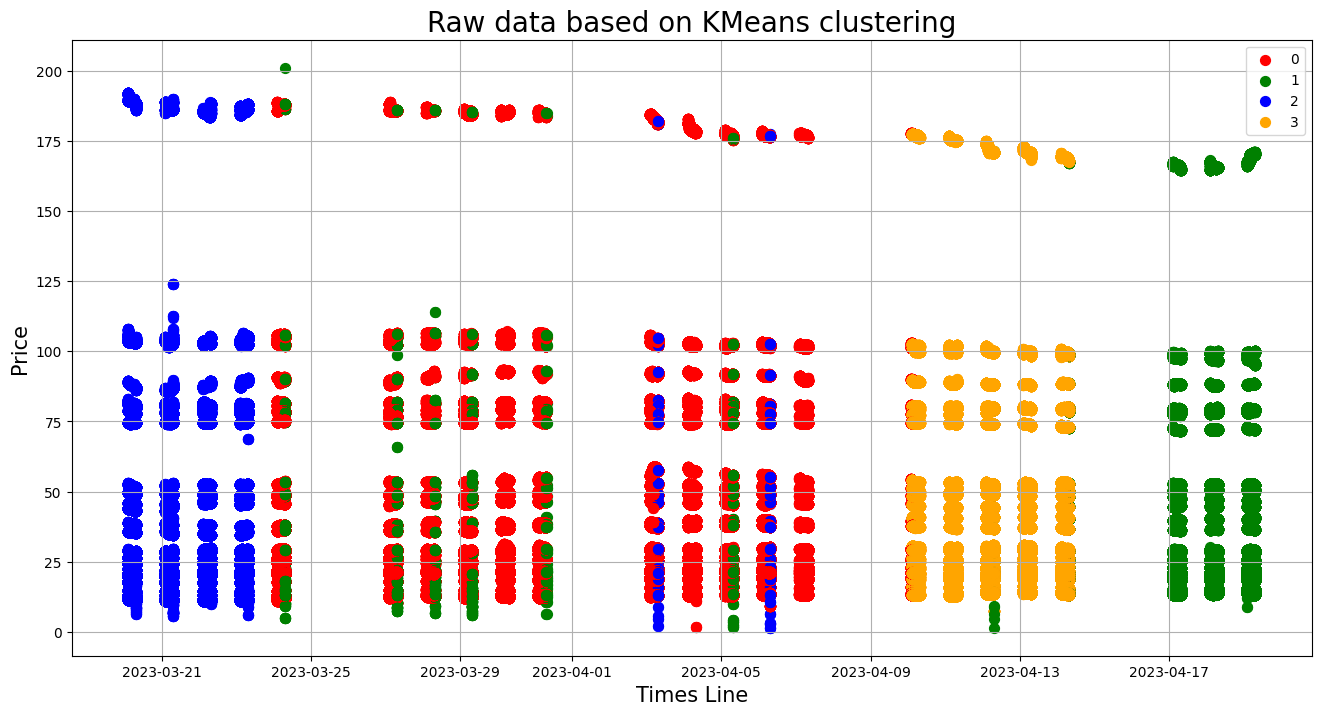

In [ ]:
fig = plt.figure(figsize = (16,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Timeline', fontsize = 15)
ax.set_ylabel('Price', fontsize = 15)
ax.set_title('Raw data based on KMeans clustering', fontsize = 20)

targets = [0, 1, 2, 3]
colors = ['red', 'green', 'blue', 'orange']
for i in final_df_raw.columns[1:61]:
  for target, color in zip(targets,colors):
      indicesToKeep = final_df_raw['target'] == target
      ax.scatter(final_df_raw.loc[indicesToKeep, '_time'], final_df_raw.loc[indicesToKeep, i], c = color, s = 50)
ax.legend(targets)
ax.grid()

Dựa vào đồ thị "Raw data based on KMeans clustering" và đồ thị "2 component PCA":
- Trong khoảng thời gian 20/03/2023 - 23/03/2023, cụm có màu chàm bị ảnh hưởng bởi PC1 nhiều nhất. Do đó, những cổ phiếu như SAB, VJC, GAS, BCM, BID,... sẽ tác động đến sự biến động của thị trường nhiều nhất trong khoảng thời gian đó.
- Trong khoảng thời gian 17/04/2023 - 19/04/2023, cụm có màu lục bị ảnh hưởng bởi PC2 nhiều nhất. Do đó, những cổ phiếu như MWG, NVL, MSN, PDR, TPB,... sẽ tác động đến sự biến động của thị trường nhiều nhất trong khoảng thời gian đó.

Cuối cùng, trong vấn đề này, PCA và KMeans dùng để biểu diễn sự tác động của 30 mã cổ phiếu khác nhau đến sự biến động của thị trường cổ phiếu trong những ngày từ 20/03/2023 - 19/04/2023. Từ đó, ta có thể dự đoán sự biến động của thị trường cổ phiếu dựa trên sự thay đổi về giá của các mã cổ phiếu trước đó để có sự đầu tư hợp lý hơn.